In [23]:
#importing all packages for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #error and warning handling

In [24]:
#input data is loaded to a dataframe
df_bank=pd.read_csv(r'C:\Users\anto2378\OneDrive Corp\OneDrive - Atkins Ltd\Desktop\EDA Group CS\loan.csv',  encoding = "ISO-8859-1")


In [25]:
#printing of the dataframe to check the data input
df_bank.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [26]:
#check for the null values in all columns
df_bank.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [46]:
#understanding the dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 49 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36191 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null datetime64[ns]
loan_status                38577 non-null object
pymnt_plan                 38577 non-null object
ur

In [27]:
#Removing columns entirely, which have more than 90% of values null
df_bank=df_bank.dropna(axis=1,thresh=len(df_bank.index)*0.9)
df_bank.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [28]:
#Removing columns with all values either 0 or null
df_bank = df_bank.loc[:, (df_bank==0).sum() +df_bank.isnull().sum(axis = 0)< len(df_bank.index)-1]
df_bank

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,1,INDIVIDUAL,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,1,INDIVIDUAL,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,1,INDIVIDUAL,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,1,INDIVIDUAL,0.0


In [29]:
#removing data where loan status is Current which is insignificant for our analysis. 
#Only defaulters and who paid out the loan needs to be considered
df_bank=df_bank.loc[df_bank['loan_status'] != 'Current']
df_bank.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0.0


In [30]:
#Formatting all columns with Date time 
df_bank['issue_d']=pd.to_datetime(df_bank['issue_d'], format="%b-%y",errors ='coerce')
df_bank['earliest_cr_line']=pd.to_datetime(df_bank['earliest_cr_line'], format="%b-%y",errors ='coerce')
df_bank['last_pymnt_d']=pd.to_datetime(df_bank['last_pymnt_d'], format="%b-%y",errors ='coerce')
df_bank['last_credit_pull_d']=pd.to_datetime(df_bank['last_credit_pull_d'], format="%b-%y",errors ='coerce')

In [45]:
#Check for the changes made
df_bank[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2016-05-01
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,2016-05-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
5,2011-12-01,2004-11-01,2015-01-01,2016-01-01


In [32]:
#remove % from interest column field.
df_bank['int_rate'] = df_bank['int_rate'].map(lambda x: x.rstrip('%'))

In [33]:
df_bank

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.0000,2015-01-01,171.62,2016-05-01,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.1100,2013-04-01,119.66,2013-09-01,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.0000,2014-06-01,649.91,2016-05-01,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.0000,2015-01-01,357.48,2016-04-01,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.0000,2015-01-01,161.03,2016-01-01,1,INDIVIDUAL,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,...,3125.23,0.00,0.00,0.0000,2016-05-01,1313.76,2016-05-01,1,INDIVIDUAL,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64,109.43,E,E1,...,939.14,0.00,0.00,0.0000,2015-01-01,111.34,2014-12-01,1,INDIVIDUAL,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,...,294.94,0.00,189.06,2.0900,2012-04-01,152.39,2012-08-01,1,INDIVIDUAL,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,...,533.42,0.00,269.29,2.5200,2012-11-01,121.45,2013-03-01,1,INDIVIDUAL,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65,153.45,C,C3,...,1178.02,0.00,0.00,0.0000,2013-06-01,1655.54,2015-12-01,1,INDIVIDUAL,0.0


In [34]:
df_bank.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,...,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,37880.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,...,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,1.0,0.043479
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,...,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,0.204583
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,...,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,1.0,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,...,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,1.0,0.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,...,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,1.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,2.000000


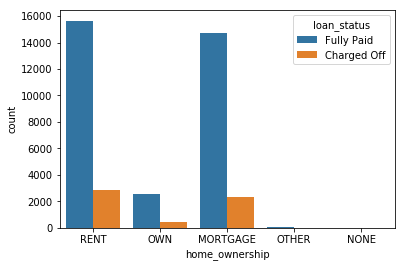

In [35]:
#bivariate analysis with loan_status and home_ownership
sns.countplot(x="home_ownership", hue='loan_status',data=df_bank)

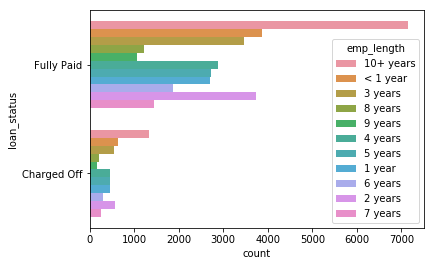

In [36]:
#bivariate analysis with loan_status and emp_length
sns.countplot(hue="emp_length", y='loan_status',data=df_bank)

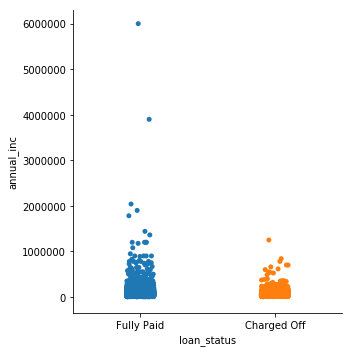

In [37]:
#bivariate analysis with loan_status and annual_inc
sns.catplot(x="loan_status",y="annual_inc", data=df_bank)

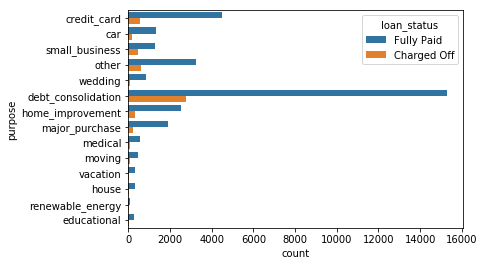

In [38]:
#bivariate analysis with loan_status and purpose
sns.countplot(hue="loan_status",y="purpose", data=df_bank)

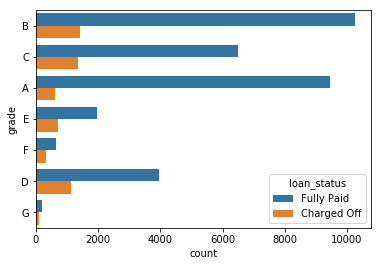

In [39]:
#bivariate analysis with loan_status and grade
sns.countplot(hue="loan_status",y="grade", data=df_bank)

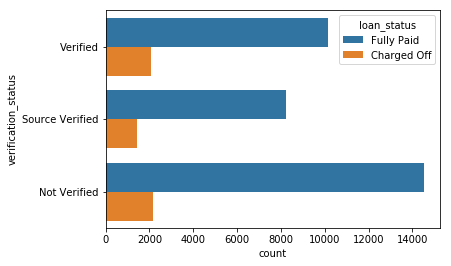

In [40]:
#bivariate analysis with loan_status and verification_status
sns.countplot(hue="loan_status",y="verification_status", data=df_bank)

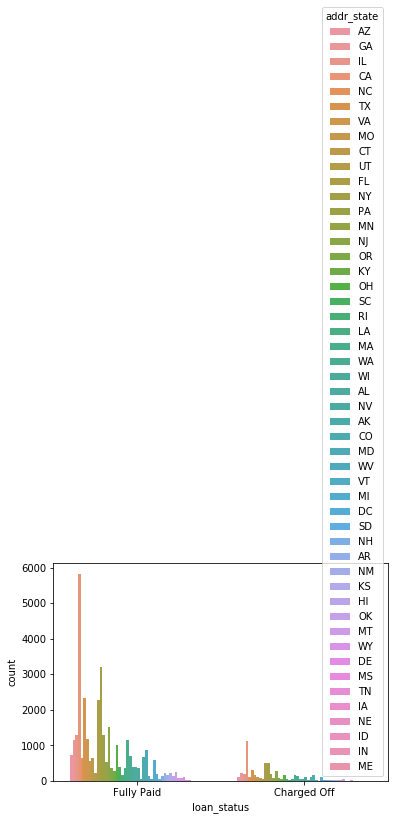

In [41]:
#bivariate analysis with loan_status and addr_state
sns.countplot(x="loan_status",hue="addr_state", data=df_bank)


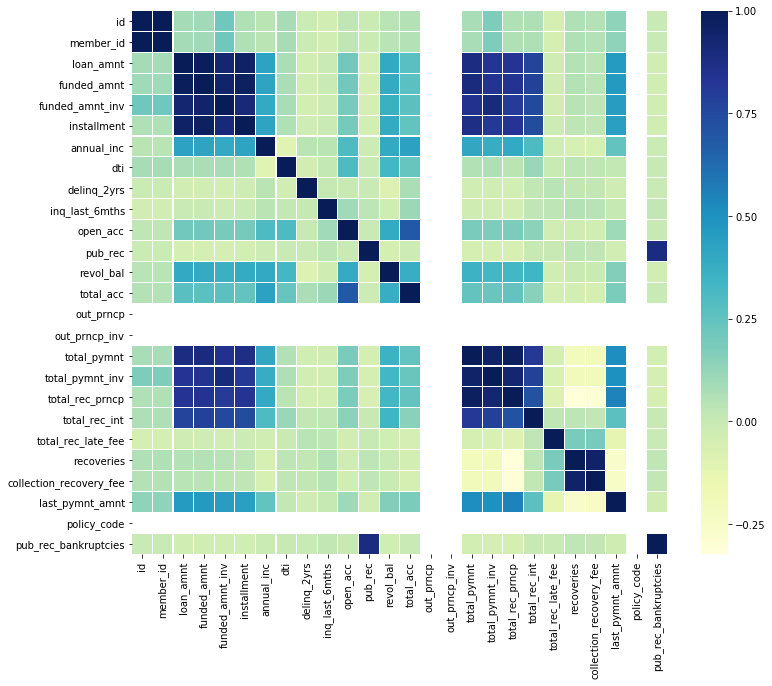

In [42]:
# co-relation between different parameters
corMat = df_bank.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corMat, ax=ax, cmap="YlGnBu", linewidths=0.1)

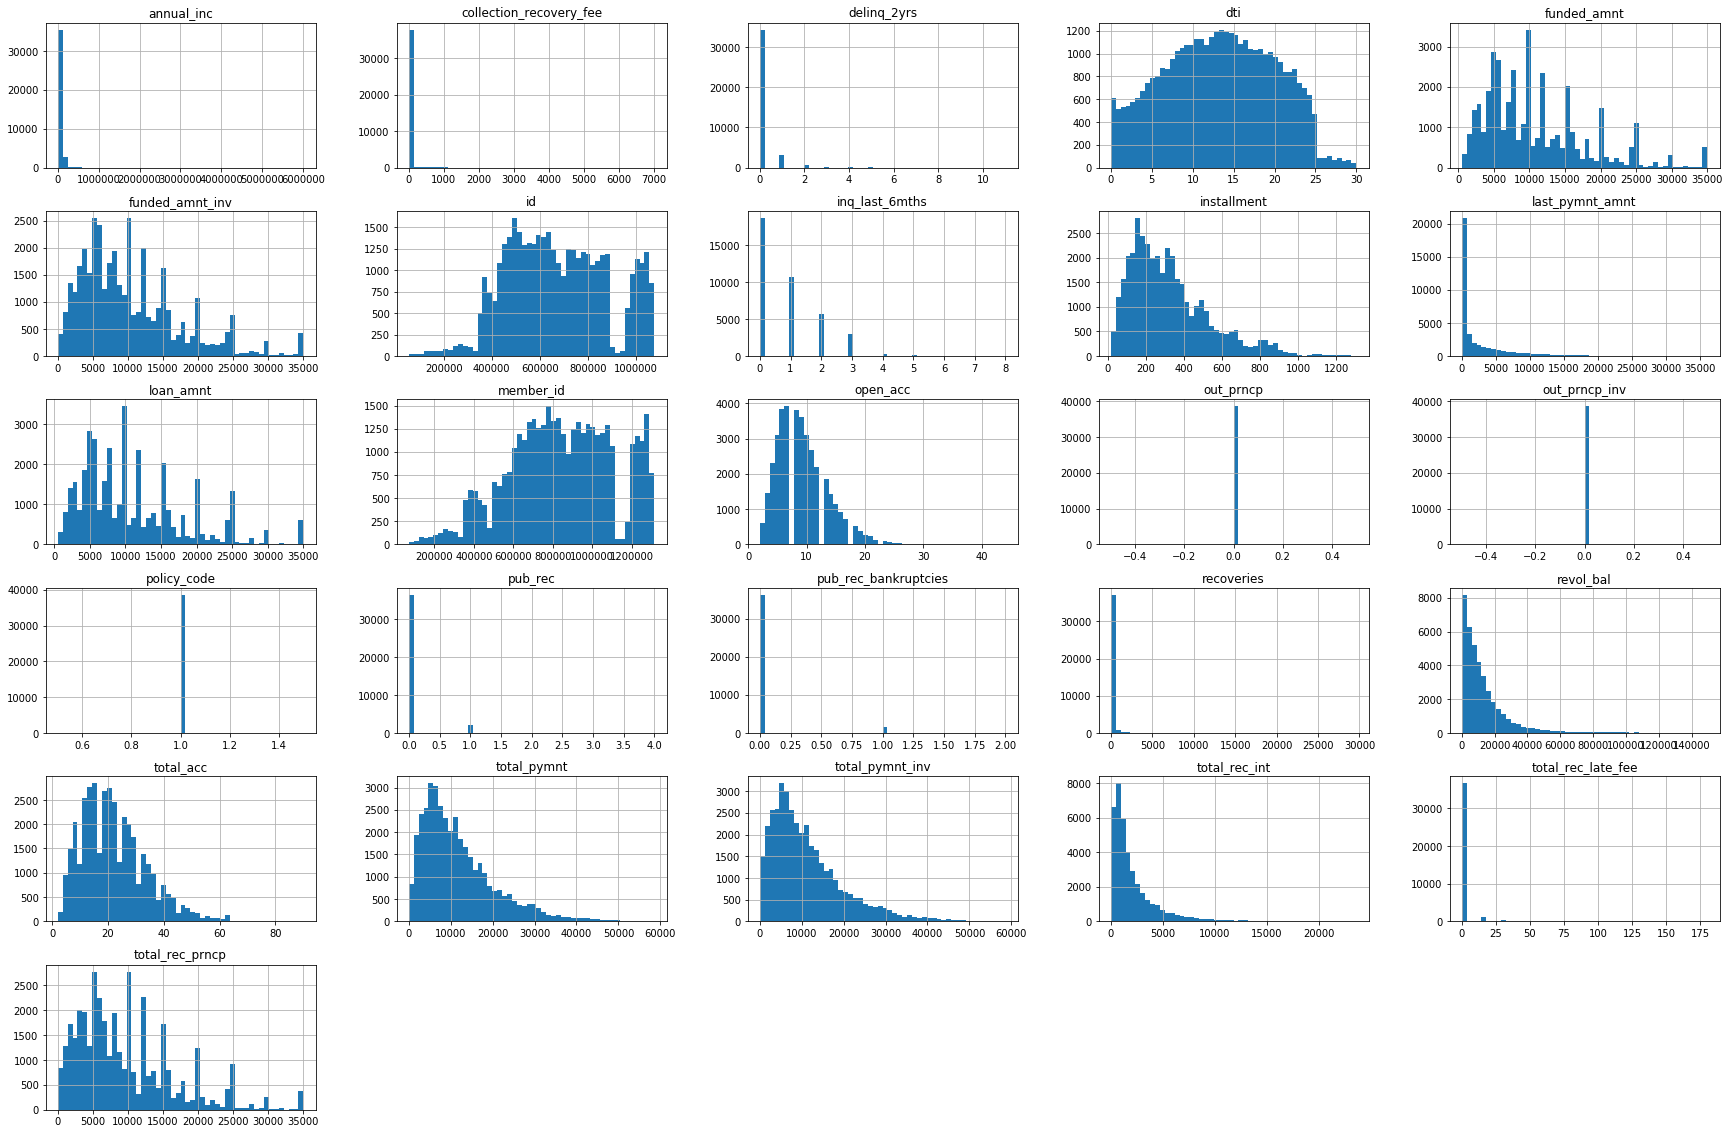

In [43]:
#uni-variate analysis
df_bank.hist(bins=50, figsize=(30,20));

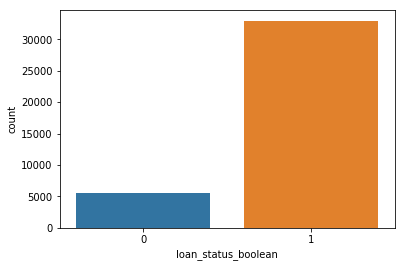

In [44]:
#uni-variate analysis
# 1 > Fully Paid
# 0 > Charged off
df_bank['loan_status_boolean'] = np.where(df_bank['loan_status'] == 'Fully Paid', 1, 0)
loan_status_count = sns.countplot(x="loan_status_boolean",data=df_bank)
df_bank.drop(columns=['loan_status_boolean'])
loan_status_count